# Prediction of Scores Using Supervised ML

- Task-1 
- Part of The Sparks Foundation Internship
- Prediction of students' scores using Simple Linear Regression

Student Data set is given with Hours of study and scores. Using this build a linear regression model is to be build which can predict scores based on the number of hours studied. 


In [1]:
# Importing the required libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the url containing data

df_url = 'http://bit.ly/w-data'

In [3]:
# Loading the data

df = pd.read_csv(df_url)

df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Shape of the dataframe

df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking for null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


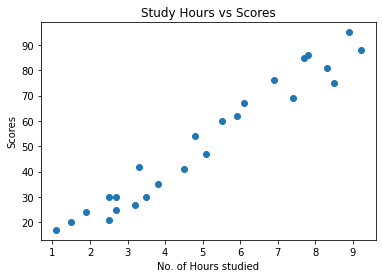

In [8]:
# Ploting and checking for linear or not

plt.scatter(x='Hours', y='Scores', data = df)
plt.title("Study Hours vs Scores")
plt.xlabel('No. of Hours studied')
plt.ylabel('Scores')
plt.show()

- There is a positive linear relationship between the number of hours and scores. 

#### Splitting the Data into Train and Test

In [9]:
#Importing the required libraris for train-test split and for model building

from sklearn.model_selection import train_test_split

In [10]:
# Train and test split

df_train, df_test = train_test_split(df, train_size = 0.6, test_size = 0.4, random_state = 100)

In [11]:
# Train data split into x and y (dependant variable and independent variable)
y_train = df_train.pop('Scores')
x_train = df_train

In [12]:
# Importing library for model buiding 
from sklearn.linear_model import LinearRegression

# Fitting the model
slregg = LinearRegression()
slregg.fit(x_train, y_train)

LinearRegression()

In [13]:
# Printing the intercept and coefficient 
print(slregg.intercept_)
print(slregg.coef_)

1.3565661270913267
[10.02193238]


#### Scores = 1.36 + 10.022*X

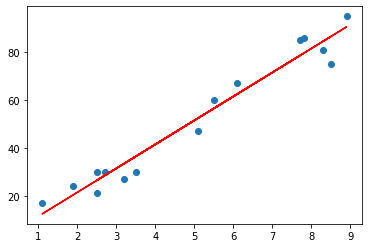

In [14]:
# Ploting the regression line  on the training data

scores = slregg.intercept_ + slregg.coef_*x_train

plt.scatter(x_train, y_train)
plt.plot(x_train, scores, 'r')
plt.show()

### Predicting on the Training Data

In [15]:
# Predicting on the training data

y_train_pred = slregg.predict(x_train)


### Residual Analysis

- To validate the assumptions of the model

C:\Users\silpa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


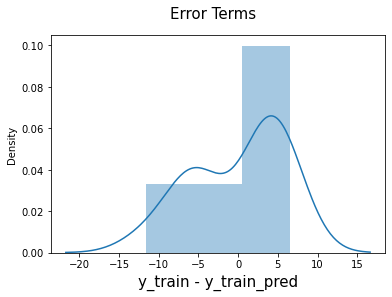

In [16]:
# Residual Analaysis
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

- The plot is giving quiet normalised distribution. 

In [17]:
# Mean of residuals
round(res.mean(), 2)

-0.0

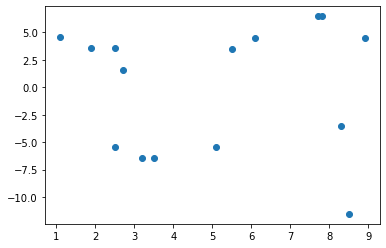

In [18]:
#Plotting the residual

plt.scatter(x_train,res)
plt.show()

- The residuals show a random pattern
- This pattern shows that the linear model provides a decent fit.

In [19]:
# Importing the metrics

from sklearn import metrics


In [20]:
# Evaluating the model on train data set
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('r2_score:',metrics.r2_score(y_train, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error: 5.176199164111124
r2_score: 0.9562349461510798
MSE: 31.578917743876406
RMSE: 5.619512233626367


### Predicting on the Test Data

In [21]:
# Dividing test data into x and y 
y_test = df_test.pop('Scores')
x_test = df_test

In [36]:
# Predicting on the test data
y_test_pred = slregg.predict(x_test)

y_test_pred

array([28.41578355, 39.43990917, 34.42894298, 60.48596716, 16.38946469,
       75.51886573, 70.50789954, 49.46184154, 93.55834401, 46.45526183])

C:\Users\silpa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


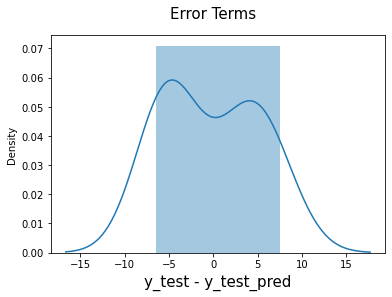

In [23]:
res_test = (y_test - y_test_pred)

fig = plt.figure()
sns.distplot(res_test)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

In [24]:
round(res_test.mean(), 2)

-0.27

- The mean of residuals is approx zero on the test data
- This could be due to very low number of test data

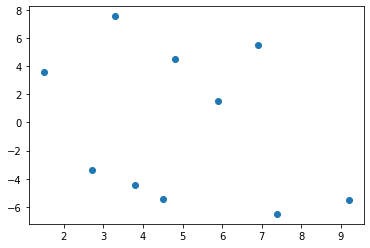

In [25]:
plt.scatter(x_test,res_test)
plt.show()

- The data residuals are scattered 

In [26]:
# Evaluating the model on test data set

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('r2_score:',metrics.r2_score(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 4.8114048367687605
r2_score: 0.9429542052545444
MSE: 25.793826552105173
RMSE: 5.0787623051394295


In [31]:
# Comparing the actual and predicted

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df_compare

,Actual,Predicted
9,25,28.415784
22,35,39.439909
13,42,34.428943
11,62,60.485967
5,20,16.389465
19,69,75.518866
23,76,70.507900
21,54,49.461842
6,88,93.558344
12,41,46.455262


In [39]:
# Predicting for an input of hours

hours = [[9.25]]

prediction = slregg.predict(hours)

print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = [9.25]
Predicted Score = 94.05944062730485


### Buidling the Linear Model using `statsmodel.api` Library

- `statsmodel.api` is another library to build linear regression model

In [27]:
import statsmodels.api as sm

In [28]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
slr = sm.OLS(y_train, x_train_sm).fit()

In [29]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
slr.params

const     1.356566
Hours    10.021932
dtype: float64

In [30]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     284.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.25e-10
Time:                        16:47:33   Log-Likelihood:                -47.178
No. Observations:                  15   AIC:                             98.36
Df Residuals:                      13   BIC:                             99.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3566      3.368      0.403      0.6

C:\Users\silpa\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- The coefficient of Hours is 10.0219 which is high
- F statistics is also low
- R squared is 0.95 

In [40]:
# Add a constant to x_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to x_test_sm
y_pred_slr = slr.predict(x_test_sm)

In [43]:
#Returns the mean squared error

np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

5.078762305139433

In [45]:
# R-squared

r_squared_slr = metrics.r2_score(y_test, y_pred_slr)
r_squared_slr

0.9429542052545444